In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
np.random.seed(42)


In [8]:
employee_ids = [f"E{str(i).zfill(3)}" for i in range(1, 31)]

In [9]:
dates = pd.date_range(start="2025-07-01", periods=30)

In [10]:
data = {
    "Date": np.tile(dates, len(employee_ids)),
    "EmployeeID": np.repeat(employee_ids, len(dates)),
    "WorkingHours": np.random.uniform(4, 10, len(dates) * len(employee_ids)).round(2)
}


In [11]:
df = pd.DataFrame(data)

In [15]:
display(df.head())

,Date,EmployeeID,WorkingHours
0,2025-07-01,E001,6.25
1,2025-07-02,E001,9.70
2,2025-07-03,E001,8.39
3,2025-07-04,E001,7.59
4,2025-07-05,E001,4.94


In [17]:
display(df.describe())

,Date,WorkingHours
count,900,900.000000
mean,2025-07-15 12:00:00.000000256,6.954233
min,2025-07-01 00:00:00,4.030000
25%,2025-07-08 00:00:00,5.387500
50%,2025-07-15 12:00:00,7.010000
75%,2025-07-23 00:00:00,8.490000
max,2025-07-30 00:00:00,10.000000
std,NaN,1.762088


In [18]:
employee_summary = df.groupby("EmployeeID")["WorkingHours"].agg(['mean', 'min', 'max', 'sum']).reset_index()
employee_summary.columns = ['EmployeeID', 'AvgHours', 'MinHours', 'MaxHours', 'TotalHours']
display(employee_summary.head())

,EmployeeID,AvgHours,MinHours,MaxHours,TotalHours
0,E001,6.632000,4.12,9.82,198.96
1,E002,6.979000,4.21,9.82,209.37
2,E003,6.893000,4.03,9.92,206.79
3,E004,6.948667,4.15,9.58,208.46
4,E005,6.735667,4.04,9.83,202.07


In [19]:
df['Anomaly'] = ((df['WorkingHours'] < 4.5) | (df['WorkingHours'] > 9.5))
anomalies = df[df['Anomaly'] == True]
print(f"\n Detected Anomalies: {len(anomalies)} rows")
display(anomalies.head())


 Detected Anomalies: 153 rows


,Date,EmployeeID,WorkingHours,Anomaly
1,2025-07-02,E001,9.70,True
6,2025-07-07,E001,4.35,True
10,2025-07-11,E001,4.12,True
11,2025-07-12,E001,9.82,True
29,2025-07-30,E001,4.28,True


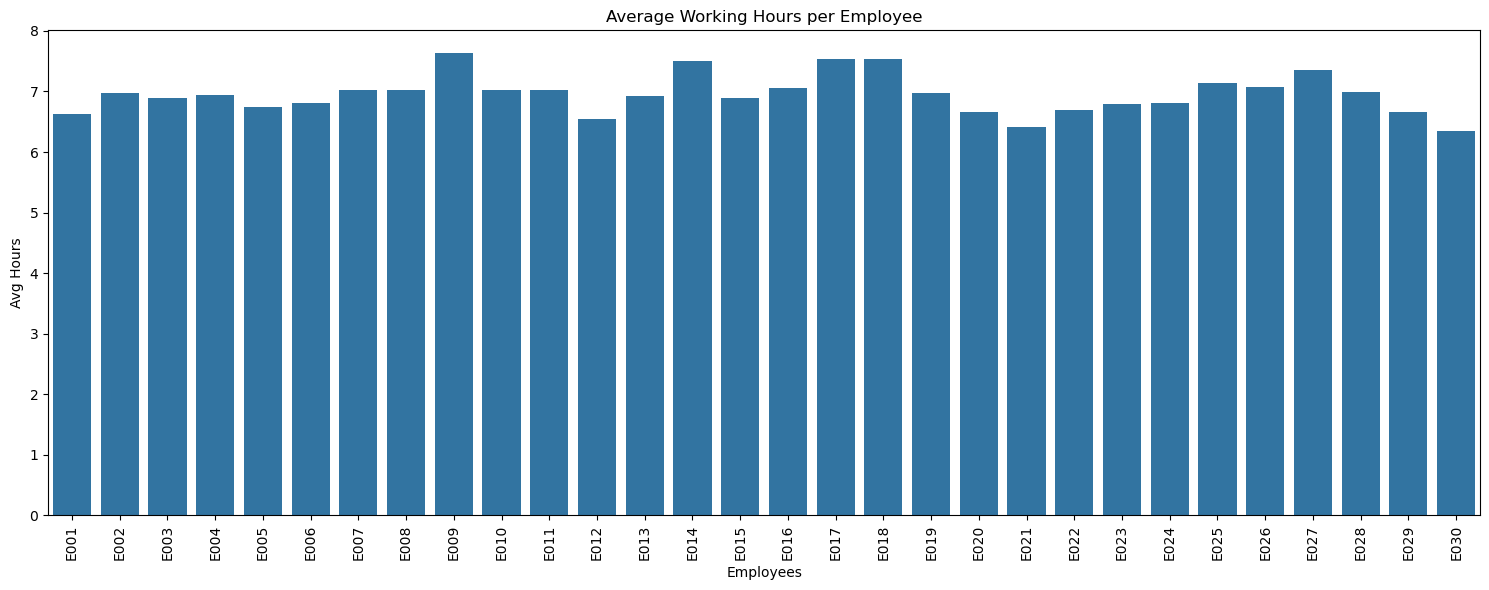

In [37]:
plt.figure(figsize=(15, 6))
sns.barplot(data=employee_summary, x='EmployeeID', y='AvgHours')
plt.title("Average Working Hours per Employee")
plt.ylabel("Avg Hours")
plt.xlabel("Employees")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

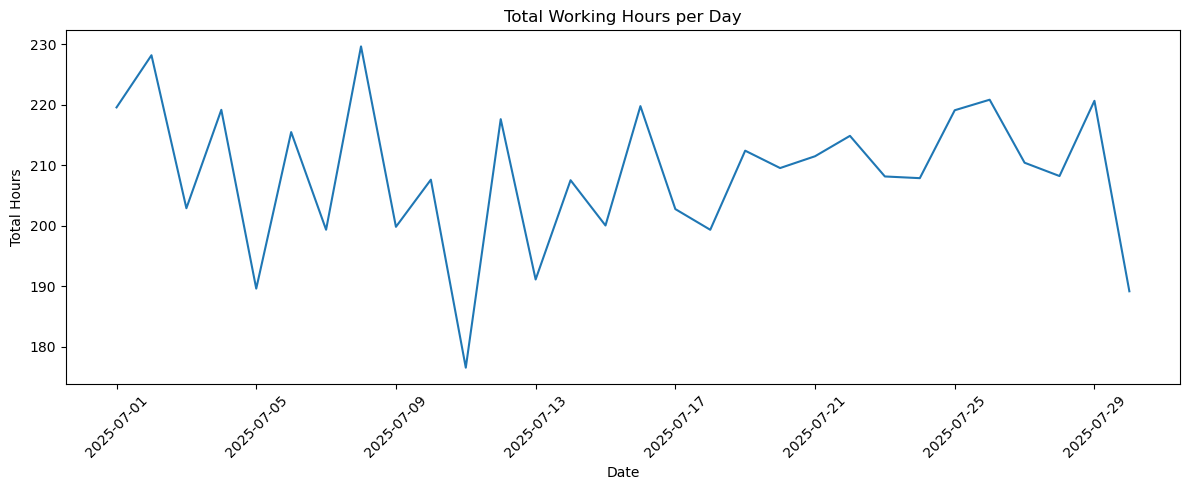

In [32]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_summary, x='Date', y='WorkingHours')
plt.title("Total Working Hours per Day")
plt.ylabel("Total Hours")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

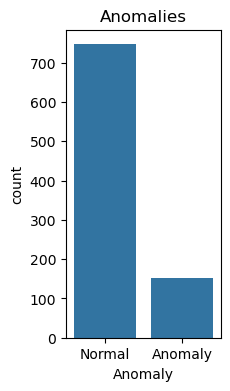

In [45]:
plt.figure(figsize=(2, 4))
sns.countplot(x='Anomaly', data=df)
plt.title("Anomalies")
plt.xticks([0, 1], ['Normal', 'Anomaly'])#true or false nu solrathu
plt.show()